# Linear Regression Demo

In [2]:
import torch
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import torch.nn as nn

In [4]:
X = torch.linspace(1,50,50).reshape(-1,1)

In [5]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [6]:
torch.manual_seed(71)
e = torch.randint(-8,9,(50,1),dtype=torch.float)


In [7]:
e

tensor([[ 2.],
        [ 7.],
        [ 2.],
        [ 6.],
        [ 2.],
        [-4.],
        [ 2.],
        [-5.],
        [ 4.],
        [ 1.],
        [ 2.],
        [ 3.],
        [ 1.],
        [-8.],
        [ 5.],
        [ 5.],
        [-6.],
        [ 0.],
        [-7.],
        [-8.],
        [-3.],
        [-1.],
        [ 2.],
        [-6.],
        [-3.],
        [ 3.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 1.],
        [ 7.],
        [ 6.],
        [-1.],
        [-6.],
        [-5.],
        [-3.],
        [ 7.],
        [ 0.],
        [ 8.],
        [-1.],
        [-2.],
        [ 2.],
        [-8.],
        [-1.],
        [ 6.],
        [-8.],
        [-3.],
        [-7.],
        [-2.]])

In [8]:
y = 2*X + 1 + e

In [9]:
y.shape

torch.Size([50, 1])

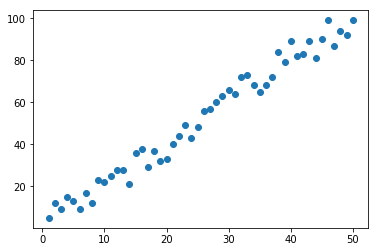

In [11]:
plt.scatter(X.numpy(), y.numpy())

In [12]:
torch.manual_seed(59)
model = nn.Linear(in_features=1,out_features=1)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [15]:
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)
    
    
    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

In [16]:
torch.manual_seed(59)
model = Model(1, 1)

print(model.linear.weight)
print(model.linear.bias)

Parameter containing:
tensor([[0.1060]], requires_grad=True)
Parameter containing:
tensor([0.9638], requires_grad=True)


In [18]:
for name, param in model.named_parameters():
    print(name, '\t', param.item())

linear.weight 	 0.10597813129425049
linear.bias 	 0.9637961387634277


In [19]:
x = torch.tensor([2.0])
print(model.forward(x))

tensor([1.1758], grad_fn=<AddBackward0>)


In [20]:
x1 = np.linspace(0,50.00,50)

In [21]:
x1

array([ 0.        ,  1.02040816,  2.04081633,  3.06122449,  4.08163265,
        5.10204082,  6.12244898,  7.14285714,  8.16326531,  9.18367347,
       10.20408163, 11.2244898 , 12.24489796, 13.26530612, 14.28571429,
       15.30612245, 16.32653061, 17.34693878, 18.36734694, 19.3877551 ,
       20.40816327, 21.42857143, 22.44897959, 23.46938776, 24.48979592,
       25.51020408, 26.53061224, 27.55102041, 28.57142857, 29.59183673,
       30.6122449 , 31.63265306, 32.65306122, 33.67346939, 34.69387755,
       35.71428571, 36.73469388, 37.75510204, 38.7755102 , 39.79591837,
       40.81632653, 41.83673469, 42.85714286, 43.87755102, 44.89795918,
       45.91836735, 46.93877551, 47.95918367, 48.97959184, 50.        ])

In [22]:
w1 = 0.1059
b1 = 0.9637

y1 = w1*x1 + b1

In [23]:
y1

array([0.9637    , 1.07176122, 1.17982245, 1.28788367, 1.3959449 ,
       1.50400612, 1.61206735, 1.72012857, 1.8281898 , 1.93625102,
       2.04431224, 2.15237347, 2.26043469, 2.36849592, 2.47655714,
       2.58461837, 2.69267959, 2.80074082, 2.90880204, 3.01686327,
       3.12492449, 3.23298571, 3.34104694, 3.44910816, 3.55716939,
       3.66523061, 3.77329184, 3.88135306, 3.98941429, 4.09747551,
       4.20553673, 4.31359796, 4.42165918, 4.52972041, 4.63778163,
       4.74584286, 4.85390408, 4.96196531, 5.07002653, 5.17808776,
       5.28614898, 5.3942102 , 5.50227143, 5.61033265, 5.71839388,
       5.8264551 , 5.93451633, 6.04257755, 6.15063878, 6.2587    ])

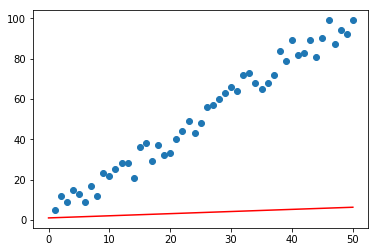

In [24]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1 ,y1, 'r')

In [25]:
criterion = nn.MSELoss() 

In [27]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001) # Stochastic gradient descent learning rate

In [38]:
epoch = 100
losses = []

for i in range(epoch):
    i +=1
    # Predicting on the forward pass
    y_pred = model.forward(X)
    # Calculate our loss
    loss = criterion(y_pred, y)
    # Record our error
    losses.append(loss)
    
    #print where we're at
    print(f'epoch {i} loss: {loss.item()} weight: {model.linear.weight.item()} bias: {model.linear.bias.item()}')
    
    optimizer.zero_grad()
    
    loss.backward()
    optimizer.step()
    

epoch 1 loss: 21.058000564575195 weight: 1.9838191270828247 bias: 1.0557515621185303
epoch 2 loss: 21.0574893951416 weight: 1.9837985038757324 bias: 1.0564652681350708
epoch 3 loss: 21.056978225708008 weight: 1.9837766885757446 bias: 1.0571786165237427
epoch 4 loss: 21.05647087097168 weight: 1.9837559461593628 bias: 1.057891607284546
epoch 5 loss: 21.05596160888672 weight: 1.9837344884872437 bias: 1.0586042404174805
epoch 6 loss: 21.05545997619629 weight: 1.9837136268615723 bias: 1.0593165159225464
epoch 7 loss: 21.054948806762695 weight: 1.9836921691894531 bias: 1.0600284337997437
epoch 8 loss: 21.054443359375 weight: 1.9836713075637817 bias: 1.0607401132583618
epoch 9 loss: 21.05393409729004 weight: 1.9836499691009521 bias: 1.0614514350891113
epoch 10 loss: 21.053434371948242 weight: 1.9836288690567017 bias: 1.0621623992919922
epoch 11 loss: 21.05292320251465 weight: 1.9836077690124512 bias: 1.0628730058670044
epoch 12 loss: 21.05242347717285 weight: 1.9835866689682007 bias: 1.063583

Text(0.5, 0, 'Epoch')

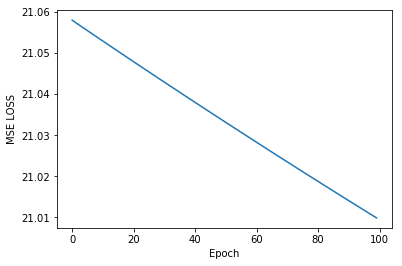

In [39]:
plt.plot(range(epoch), losses)
plt.ylabel('MSE LOSS')
plt.xlabel('Epoch')

In [40]:
x = np.linspace(0.0, 50.0, 50)
current_weight = model.linear.weight.item()
current_bias = model.linear.bias.item()

predicted_y = current_weight*x  + current_bias

In [41]:
predicted_y

array([  1.12543678,   3.14762958,   5.16982237,   7.19201517,
         9.21420796,  11.23640076,  13.25859355,  15.28078634,
        17.30297914,  19.32517193,  21.34736473,  23.36955752,
        25.39175032,  27.41394311,  29.43613591,  31.4583287 ,
        33.48052149,  35.50271429,  37.52490708,  39.54709988,
        41.56929267,  43.59148547,  45.61367826,  47.63587106,
        49.65806385,  51.68025664,  53.70244944,  55.72464223,
        57.74683503,  59.76902782,  61.79122062,  63.81341341,
        65.83560621,  67.857799  ,  69.87999179,  71.90218459,
        73.92437738,  75.94657018,  77.96876297,  79.99095577,
        82.01314856,  84.03534136,  86.05753415,  88.07972694,
        90.10191974,  92.12411253,  94.14630533,  96.16849812,
        98.19069092, 100.21288371])

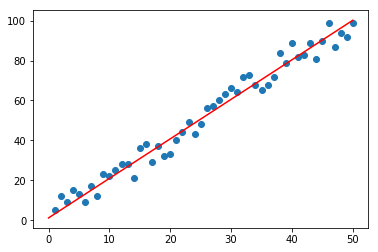

In [42]:
plt.scatter(X.numpy(), y.numpy())
plt.plot(x, predicted_y, 'r')